In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import os
os.listdir()

['.ipynb_checkpoints',
 'sample_submission.csv',
 'test_images.npy',
 'train_images.npy',
 'train_labels.csv',
 'Untitled.ipynb']

In [6]:
import keras 
import keras.backend as k
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,ZeroPadding2D
from keras.layers import Dense,Dropout,Flatten
from keras.layers.normalization import BatchNormalization
from keras import losses
from keras.optimizers import Adam,RMSprop,Adadelta
from sklearn.model_selection import train_test_split

from keras.applications.vgg16 import preprocess_input,decode_predictions
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [36]:
num_classes=10
#load the image data
train_data=np.load('train_images.npy')
train_data=np.reshape(train_data,(50000,32,32,3))
train_data.shape

(50000, 32, 32, 3)

In [39]:
test_data = np.load("test_images.npy")
test_data = np.reshape(test_data,(200000,32,32,3))
test_data.shape

(200000, 32, 32, 3)

In [41]:
labels = pd.read_csv("train_labels.csv")
labels.head()

,Id,Category
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [44]:
label_data = pd.Series(labels["Category"])
label_data.head()

0          frog
1         truck
2         truck
3          deer
4    automobile
Name: Category, dtype: object

# Normalization

In [51]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
label_data=lb.fit_transform(label_data)


train_data=train_data/255
test_data=test_data/255

# Split the train dataset

In [56]:
X_train,X_val,Y_train,Y_val=train_test_split(train_data,label_data,test_size=0.2,random_state=42)
print(X_train.shape,X_val.shape)
print(Y_train.shape,Y_val.shape)

(40000, 32, 32, 3) (10000, 32, 32, 3)
(40000, 10) (10000, 10)


# CNN model

In [58]:
model = Sequential()
model.add(Conv2D(32, (3, 3),activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model

In [61]:
model.compile(loss=losses.categorical_crossentropy,optimizer=Adadelta(),metrics=['accuracy'])

# Training the model

In [63]:
cnn=model.fit(X_train,Y_train,batch_size=128,epochs=10,verbose=1,validation_data=(X_val,Y_val),shuffle=True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 125s 3ms/step - loss: 1.7335 - acc: 0.3814 - val_loss: 1.4349 - val_acc: 0.4924
Epoch 2/10
40000/40000 [==============================] - 125s 3ms/step - loss: 1.4359 - acc: 0.4922 - val_loss: 1.2619 - val_acc: 0.5632
Epoch 3/10
40000/40000 [==============================] - 131s 3ms/step - loss: 1.3012 - acc: 0.5446 - val_loss: 1.2221 - val_acc: 0.5766
Epoch 4/10
40000/40000 [==============================] - 124s 3ms/step - loss: 1.2003 - acc: 0.5798 - val_loss: 1.1422 - val_acc: 0.6021
Epoch 5/10
40000/40000 [==============================] - 127s 3ms/step - loss: 1.1255 - acc: 0.6061 - val_loss: 1.0900 - val_acc: 0.6231
Epoch 6/10
40000/40000 [==============================] - 140s 3ms/step - loss: 1.0540 - acc: 0.6326 - val_loss: 1.0692 - val_acc: 0.6332
Epoch 7/10
40000/40000 [==============================] - 137s 3ms/step - loss: 0.9906 - acc: 0.6545 - val_loss: 1.0506 - 

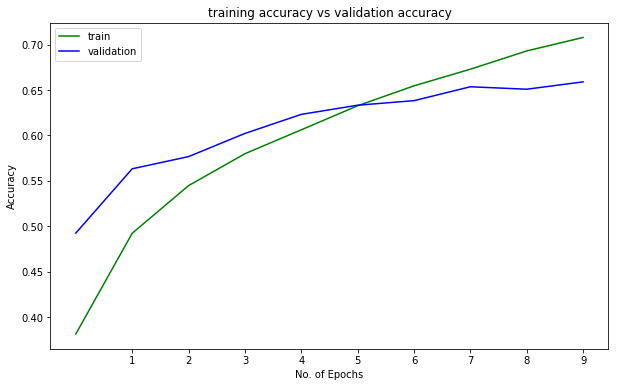

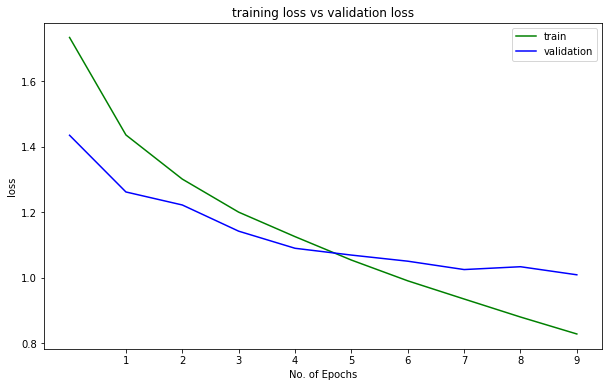

In [68]:
#Plots fro training and validation process:loss and accuracy
plt.figure(figsize=(10,6))
plt.plot(cnn.history['acc'],'g')
plt.plot(cnn.history['val_acc'],'b')
plt.xticks(np.arange(1,10))
plt.title('training accuracy vs validation accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','validation'])
plt.show()

plt.figure(figsize=(10,6))
plt.plot(cnn.history['loss'],'g')
plt.plot(cnn.history['val_loss'],'b')
plt.xticks(np.arange(1,10))
plt.title('training loss vs validation loss')
plt.xlabel('No. of Epochs')
plt.ylabel('loss')
plt.legend(['train','validation'])
plt.show()

# prediction

In [73]:
model.predict_classes(test_data[3].reshape(1,32,32,3))

array([3], dtype=int64)